# Analyse of the relations between bankrupts and government mesures for the covid situation

In [266]:
import pandas as pd

## Importing the datasets

In [267]:
!wget -N https://statbel.fgov.be/sites/default/files/files/documents/Ondernemingen/7.5%20Faillissementen/Faill_Heb_fr.xlsx
!wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset_0.xlsx

--2021-01-26 14:13:53--  https://statbel.fgov.be/sites/default/files/files/documents/Ondernemingen/7.5%20Faillissementen/Faill_Heb_fr.xlsx
Resolving statbel.fgov.be (statbel.fgov.be)... 193.191.245.224
Connecting to statbel.fgov.be (statbel.fgov.be)|193.191.245.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Server ignored If-Modified-Since header for file 'Faill_Heb_fr.xlsx'.
You might want to add --no-if-modified-since option.

--2021-01-26 14:13:53--  https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset_0.xlsx
Resolving www.acaps.org (www.acaps.org)... 151.80.35.46
Connecting to www.acaps.org (www.acaps.org)|151.80.35.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Server ignored If-Modified-Since header for file 'acaps_covid19_government_measures_dataset_0.xlsx'.
You might want to add --no-if-modified-since option.



In [268]:
fail = pd.read_excel("Faill_Heb_fr.xlsx",keep_default_na=False, na_values='', engine='openpyxl',header=[0,1],index_col=[0,1,2,3])

In [269]:
fail.head()

Région de Bruxelles-Capitale                \
Date fin                                         Faillites Pertes emploi   
2010 53 2009-12-28 2010-01-03                            .             .   
     1  2010-01-04 2010-01-10                           77            76   
     2  2010-01-11 2010-01-17                           38            78   
     3  2010-01-18 2010-01-24                           42            86   
     4  2010-01-25 2010-01-31                           26            26   

                              Région flamande               Région wallonne  \
Date fin                            Faillites Pertes emploi       Faillites   
2010 53 2009-12-28 2010-01-03               .             .               1   
     1  2010-01-04 2010-01-10             129           193              47   
     2  2010-01-11 2010-01-17             116           230              53   
     3  2010-01-18 2010-01-24              88           168              58   
     4  2010-01-25 2010-01-31              82           111              54   

                                                Total                \
Date fin                      Pertes emploi Faillites Pertes emploi   
2010 53 2009-12-28 2010-01-03            11         1            11   
     1  2010-01-04 2010-01-10           256       253           525   
     2  2010-01-11 2010-01-17            89       207           397   
     3  2010-01-18 2010-01-24           103       188           357   
     4  2010-01-25 2010-01-31            80       162           217   

                                               
Date fin                      Pertes emploi.1  
2010 53 2009-12-28 2010-01-03             NaN  
     1  2010-01-04 2010-01-10             NaN  
     2  2010-01-11 2010-01-17             NaN  
     3  2010-01-18 2010-01-24             NaN  
     4  2010-01-25 2010-01-31             NaN

In [270]:
gov = pd.read_excel("acaps_covid19_government_measures_dataset_0.xlsx", sheet_name="Dataset",engine='openpyxl')

In [271]:
gov.head()

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN


## Cleaning

In [272]:
fail.drop("Pertes emploi.1",axis=1,level=1,inplace=True)

In [273]:
fail.head()

Région de Bruxelles-Capitale                \
Date fin                                         Faillites Pertes emploi   
2010 53 2009-12-28 2010-01-03                            .             .   
     1  2010-01-04 2010-01-10                           77            76   
     2  2010-01-11 2010-01-17                           38            78   
     3  2010-01-18 2010-01-24                           42            86   
     4  2010-01-25 2010-01-31                           26            26   

                              Région flamande               Région wallonne  \
Date fin                            Faillites Pertes emploi       Faillites   
2010 53 2009-12-28 2010-01-03               .             .               1   
     1  2010-01-04 2010-01-10             129           193              47   
     2  2010-01-11 2010-01-17             116           230              53   
     3  2010-01-18 2010-01-24              88           168              58   
     4  2010-01-25 2010-01-31              82           111              54   

                                                Total                
Date fin                      Pertes emploi Faillites Pertes emploi  
2010 53 2009-12-28 2010-01-03            11         1            11  
     1  2010-01-04 2010-01-10           256       253           525  
     2  2010-01-11 2010-01-17            89       207           397  
     3  2010-01-18 2010-01-24           103       188           357  
     4  2010-01-25 2010-01-31            80       162           217

In [274]:
fail.describe()

Région wallonne                     Total              
Date fin       Faillites Pertes emploi   Faillites Pertes emploi
count         577.000000    577.000000  577.000000    577.000000
mean           52.623917    133.071057  190.043328    418.197574
std            21.017494     82.178267   65.273356    197.561170
min             1.000000      2.000000    1.000000     11.000000
25%            38.000000     75.000000  148.000000    290.000000
50%            54.000000    119.000000  195.000000    397.000000
75%            67.000000    171.000000  234.000000    528.000000
max           112.000000    554.000000  362.000000   1694.000000

In [275]:
fail[fail['Région de Bruxelles-Capitale']['Faillites'] == '.']

Région de Bruxelles-Capitale                \
Date fin                                         Faillites Pertes emploi   
2010 53 2009-12-28 2010-01-03                            .             .   
2012 28 2012-07-09 2012-07-15                            .             .   
2013 30 2013-07-22 2013-07-28                            .             .   
2014 35 2014-08-25 2014-08-31                            .             .   
2016 13 2016-03-28 2016-04-03                            .             .   
     29 2016-07-18 2016-07-24                            .             .   
     31 2016-08-01 2016-08-07                            .             .   
     33 2016-08-15 2016-08-21                            .             .   
     35 2016-08-29 2016-09-04                            .             .   
2017 52 2016-12-26 2017-01-01                            .             .   
     27 2017-07-03 2017-07-09                            .             .   
     29 2017-07-17 2017-07-23                            .             .   
     31 2017-07-31 2017-08-06                            .             .   
     52 2017-12-25 2017-12-31                            .             .   
2018 1  2018-01-01 2018-01-07                            .             .   
     52 2018-12-24 2018-12-30                            .             .   
2019 16 2019-04-15 2019-04-21                            .             .   
     33 2019-08-12 2019-08-18                            .             .   
     35 2019-08-26 2019-09-01                            .             .   
2020 30 2020-07-20 2020-07-26                            .             .   
     32 2020-08-03 2020-08-09                            .             .   
     53 2020-12-28 2021-01-03                            .             .   

                              Région flamande               Région wallonne  \
Date fin                            Faillites Pertes emploi       Faillites   
2010 53 2009-12-28 2010-01-03               .             .               1   
2012 28 2012-07-09 2012-07-15              71           167              66   
2013 30 2013-07-22 2013-07-28              65           149              61   
2014 35 2014-08-25 2014-08-31              55            84              19   
2016 13 2016-03-28 2016-04-03              39           114              24   
     29 2016-07-18 2016-07-24              35            52              12   
     31 2016-08-01 2016-08-07              37            88              16   
     33 2016-08-15 2016-08-21              51            75              22   
     35 2016-08-29 2016-09-04              58            77              19   
2017 52 2016-12-26 2017-01-01              29            43              17   
     27 2017-07-03 2017-07-09             110           373              33   
     29 2017-07-17 2017-07-23              47            57              23   
     31 2017-07-31 2017-08-06              40            41              11   
     52 2017-12-25 2017-12-31              21            22              30   
2018 1  2018-01-01 2018-01-07              68           101              25   
     52 2018-12-24 2018-12-30              30            37              17   
2019 16 2019-04-15 2019-04-21              63           110              42   
     33 2019-08-12 2019-08-18              54            94              17   
     35 2019-08-26 2019-09-01              44            49              27   
2020 30 2020-07-20 2020-07-26              39            59               8   
     32 2020-08-03 2020-08-09              68          1207              16   
     53 2020-12-28 2021-01-03              26            36              15   

                                                Total                
Date fin                      Pertes emploi Faillites Pertes emploi  
2010 53 2009-12-28 2010-01-03            11         1            11  
2012 28 2012-07-09 2012-07-15           131       137           298  
2013 30 2013-07-22 2013-07-2

In [276]:
fail[fail['Région de Bruxelles-Capitale']['Faillites'] == 0]

Empty DataFrame
Columns: [(Région de Bruxelles-Capitale, Faillites), (Région de Bruxelles-Capitale, Pertes emploi), (Région flamande, Faillites), (Région flamande, Pertes emploi), (Région wallonne, Faillites), (Région wallonne, Pertes emploi), (Total, Faillites), (Total, Pertes emploi)]
Index: []

In [277]:
# fonction to replace all the dots by 0

In [278]:
fail = fail.replace(["."],0)

In [279]:
fail.head()

Région de Bruxelles-Capitale                \
Date fin                                         Faillites Pertes emploi   
2010 53 2009-12-28 2010-01-03                            0             0   
     1  2010-01-04 2010-01-10                           77            76   
     2  2010-01-11 2010-01-17                           38            78   
     3  2010-01-18 2010-01-24                           42            86   
     4  2010-01-25 2010-01-31                           26            26   

                              Région flamande               Région wallonne  \
Date fin                            Faillites Pertes emploi       Faillites   
2010 53 2009-12-28 2010-01-03               0             0               1   
     1  2010-01-04 2010-01-10             129           193              47   
     2  2010-01-11 2010-01-17             116           230              53   
     3  2010-01-18 2010-01-24              88           168              58   
     4  2010-01-25 2010-01-31              82           111              54   

                                                Total                
Date fin                      Pertes emploi Faillites Pertes emploi  
2010 53 2009-12-28 2010-01-03            11         1            11  
     1  2010-01-04 2010-01-10           256       253           525  
     2  2010-01-11 2010-01-17            89       207           397  
     3  2010-01-18 2010-01-24           103       188           357  
     4  2010-01-25 2010-01-31            80       162           217

In [280]:
fail.columns

MultiIndex([('Région de Bruxelles-Capitale',     'Faillites'),
            ('Région de Bruxelles-Capitale', 'Pertes emploi'),
            (             'Région flamande',     'Faillites'),
            (             'Région flamande', 'Pertes emploi'),
            (             'Région wallonne',     'Faillites'),
            (             'Région wallonne', 'Pertes emploi'),
            (                       'Total',     'Faillites'),
            (                       'Total', 'Pertes emploi')],
           names=[None, 'Date fin'])

In [281]:
fail_reset = fail.reset_index()

In [282]:
fail_reset.rename(columns={"level_3":"Date"},inplace=True)

In [283]:
fail_reset.set_index("Date",drop=True,inplace=True)

In [284]:
fail_reset.drop(["level_0","level_1","level_2"],axis=1,level=0,inplace=True)

In [285]:
fail_reset.columns

MultiIndex([('Région de Bruxelles-Capitale',     'Faillites'),
            ('Région de Bruxelles-Capitale', 'Pertes emploi'),
            (             'Région flamande',     'Faillites'),
            (             'Région flamande', 'Pertes emploi'),
            (             'Région wallonne',     'Faillites'),
            (             'Région wallonne', 'Pertes emploi'),
            (                       'Total',     'Faillites'),
            (                       'Total', 'Pertes emploi')],
           names=[None, 'Date fin'])

In [286]:
fail_reset.head()

Région de Bruxelles-Capitale               Région flamande  \
Date fin                      Faillites Pertes emploi       Faillites   
Date                                                                    
2010-01-03                            0             0               0   
2010-01-10                           77            76             129   
2010-01-17                           38            78             116   
2010-01-24                           42            86              88   
2010-01-31                           26            26              82   

                         Région wallonne                   Total                
Date fin   Pertes emploi       Faillites Pertes emploi Faillites Pertes emploi  
Date                                                                            
2010-01-03             0               1            11         1            11  
2010-01-10           193              47           256       253           525  
2010-01-17           230              53            89       207           397  
2010-01-24           168              58           103       188           357  
2010-01-31           111              54            80       162           217

# Plot

<AxesSubplot:xlabel='Date'>

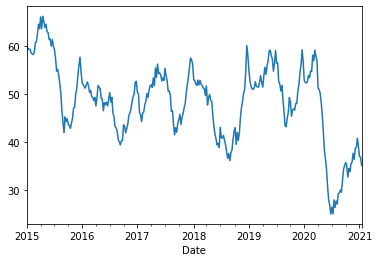

In [287]:
fail_reset["Région wallonne"]["Faillites"].rolling(15).mean().loc["2015":].plot()

<AxesSubplot:xlabel='Date'>

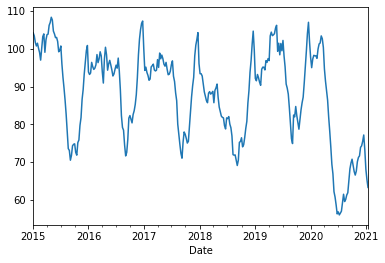

In [288]:
fail_reset["Région flamande"]["Faillites"].rolling(15).mean().loc["2015":].plot()

----------------------------------------------------------

In [295]:
gov

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23918,13724,ZWE,Zimbabwe,Africa,NaN,NaN,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,checked,Identification/travel documents of returness w...,Not available,2020-06-09,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...,2020-06-13,NaN
23919,14735,ZWE,Zimbabwe,Africa,NaN,NaN,Phase-out measure,Social distancing,Closure of businesses and public services,checked,Safari Operators for local hunting only and Na...,Not applicable,2020-06-30,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1278043...,2020-07-03,NaN
23920,14734,ZWE,Zimbabwe,Africa,NaN,NaN,Phase-out measure,Social distancing,Closure of businesses and public services,checked,Restaurants now allowed to serve sit-in meals ...,Not applicable,2020-06-30,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1278043...,2020-07-03,NaN
23921,13723,ZWE,Zimbabwe,Africa,NaN,NaN,Phase-out measure,Social distancing,Schools closure,NaN,the re-opening of schools be moved from the pr...,Not applicable,2020-07-28,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...,2020-06-13,NaN


In [327]:
measure_be = gov[gov["ISO"]=="BEL"]

In [328]:
measure_be = measure_be[["ADMIN_LEVEL_NAME","LOG_TYPE","CATEGORY","MEASURE","ENTRY_DATE","COMMENTS"]].reset_index(drop=True)

In [329]:
measure_be.head()

,ADMIN_LEVEL_NAME,LOG_TYPE,CATEGORY,MEASURE,ENTRY_DATE,COMMENTS
0,Wollonia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,2020-04-11,Care institutions and psychiatric units closed...
1,Wollonia,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,2020-04-11,"The gas, electricity and water services may no..."
2,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,2020-04-14,Centralized data gathering system to inform re...
3,NaN,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,2020-04-16,Regional governments have also announced addit...
4,Flanders,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,2020-04-20,A number of tax measures (e.g. deferral) imple...


In [330]:
measure_be.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ADMIN_LEVEL_NAME  90 non-null     object        
 1   LOG_TYPE          254 non-null    object        
 2   CATEGORY          254 non-null    object        
 3   MEASURE           254 non-null    object        
 4   ENTRY_DATE        254 non-null    datetime64[ns]
 5   COMMENTS          252 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 12.0+ KB


In [331]:
measure_be.set_index("ENTRY_DATE",inplace=True)

In [332]:
measure_be["ADMIN_LEVEL_NAME"].value_counts()

Flanders                                                  46
Wallonia                                                  24
Brussels                                                   4
Brussels and Wallonia                                      3
Wollonia                                                   2
Brussel                                                    2
Brussels region                                            1
Brussels Region, Flanders                                  1
Wallonia and Brussels                                      1
Antwerp                                                    1
Coast Municipalities                                       1
Brussels Region                                            1
Sint-Pieters-Woluwe, Sint-Lambrechts-Woluwe, Etterbeek     1
Saint-Josse                                                1
Courcelles                                                 1
Name: ADMIN_LEVEL_NAME, dtype: int64

In [346]:
measure_be["ADMIN_LEVEL_NAME"].fillna("Pays",inplace=True)

In [347]:
def set_wallonia(item):
    if item in ["Wallonia","Brussels and Wallonia","Wollonia","Wallonia and Brussels","Pays"]:
        return 1
    return 0

def set_bxl(item):
    if item in ["Brussels","Brussels and Wallonia","Wallonia and Brussels","Brussel","Brussels region",
                "Brussels Region, Flanders","Brussels Region","Pays"]:
        return 1
    
    return 0

def set_flanders(item):
    if item in ["Flanders","Antwerp","Brussels Region, Flanders","Coast Municipalities","Pays"]:
        return 1
    return 0
    

In [353]:
measure_be["is_wallon"] = measure_be["ADMIN_LEVEL_NAME"].apply(set_wallonia)
measure_be["is_bxl"] = measure_be["ADMIN_LEVEL_NAME"].apply(set_bxl)
measure_be["is_flander"] = measure_be["ADMIN_LEVEL_NAME"].apply(set_flanders)

In [368]:
measure_be["LOG_TYPE"].value_counts()

Introduction / extension of measures    172
Phase-out measure                        82
Name: LOG_TYPE, dtype: int64

In [ ]:
measure_be

# Timeline

In [377]:
import plotly.express as px

In [378]:
#Exemple Type
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Completion_pct=50),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Completion_pct=25),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Completion_pct=75)
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Completion_pct")
fig.update_yaxes(autorange="reversed")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [357]:
measure_be.head(1)

,ADMIN_LEVEL_NAME,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,is_wallon,is_bxl,is_flander
ENTRY_DATE,,,,,,,,
2020-04-11,Wollonia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,Care institutions and psychiatric units closed...,1,0,0


In [372]:
measure_be["CATEGORY"].value_counts()

Social distancing                         99
Public health measures                    83
Governance and socio-economic measures    43
Movement restrictions                     25
Lockdown                                   4
Name: CATEGORY, dtype: int64

In [373]:
measure_be[measure_be["CATEGORY"]=="Social distancing"]

,ADMIN_LEVEL_NAME,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,is_wallon,is_bxl,is_flander
ENTRY_DATE,,,,,,,,
2020-04-20,Flanders,Introduction / extension of measures,Social distancing,Schools closure,Extension until 3rd May,0,0,1
2020-04-20,Flanders,Introduction / extension of measures,Social distancing,Schools closure,Universities decided to stick with digital tea...,0,0,1
2020-04-20,Pays,Introduction / extension of measures,Social distancing,Closure of businesses and public services,"Museums, sports facilities and recreational ar...",1,1,1
2020-04-25,Pays,Phase-out measure,Social distancing,Closure of businesses and public services,Railway services gradually reopening to 'near-...,1,1,1
2020-05-16,Pays,Phase-out measure,Social distancing,Closure of businesses and public services,Opening of beaches,1,1,1
...,...,...,...,...,...,...,...,...
2020-12-06,Pays,Phase-out measure,Social distancing,Closure of businesses and public services,All non-essential shops will be permitted to r...,1,1,1
2020-12-06,Pays,Introduction / extension of measures,Social distancing,Limit public gatherings,People are required to shop alone and can only...,1,1,1
2020-12-06,Pays,Phase-out measure,Social distancing,Closure of businesses and public services,"Museums and swimming pools can also reopen, pr...",1,1,1


In [358]:
measure_be.tail(1)

,ADMIN_LEVEL_NAME,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,is_wallon,is_bxl,is_flander
ENTRY_DATE,,,,,,,,
2020-12-06,Wallonia and Brussels,Introduction / extension of measures,Movement restrictions,Curfews,The 22:00 curfew start in Wallonia and Brussel...,1,1,0


In [362]:
 x = measure_be.reset_index()

## Analysing